# Homework 2

## Almost Shakespeare

Let's try to generate some Shakespeare poetry using RNNs. The sonnets file is available in the notebook directory.

Text generation can be designed in several steps:
    
1. Data loading
2. Dictionary generation
3. Data preprocessing
4. Model (neural network) training
5. Text generation (model evaluation)

### Data loading

Shakespeare sonnets are awailable at this [link](http://www.gutenberg.org/ebooks/1041?msg=welcome_stranger). In addition, they are stored in the same directory as this notebook (`sonnetes.txt`).

Simple preprocessing is already done for you in the next cell: all technical info is dropped.

**Alternatively**

You could use file `onegin.txt` with Russian texts or your natve language poetry to be able to assess results quality.

**Note: In case of Onegin text you need to adjust reading procedure yourself!!!** (this file has a bit different format than `sonnets.txt`)

In [30]:
!wget -nc https://raw.githubusercontent.com/v-goncharenko/madmo-adv/55d929befa12370fc18109f5333f7cf000ea27ce/homeworks/sonnets.txt
!wget -nc https://raw.githubusercontent.com/v-goncharenko/madmo-adv/55d929befa12370fc18109f5333f7cf000ea27ce/homeworks/onegin.txt

File ‘sonnets.txt’ already there; not retrieving.

File ‘onegin.txt’ already there; not retrieving.



In [31]:
with open("sonnets.txt", "r") as iofile:
    text = iofile.readlines()

TEXT_START = 45
TEXT_END = -368
text = text[TEXT_START:TEXT_END]
assert len(text) == 2616

In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [32]:
import string
import numpy as np

In [33]:
# Join all the strings into one and lowercase it
# Put result into variable text.
text = [word.lower() for word in text]
text = ''.join(text)
# Your great code here

assert len(text) == 100225, "Are you sure you have concatenated all the strings?"
assert not any([x in set(text) for x in string.ascii_uppercase]), "Uppercase letters are present"
print("OK!")

OK!


Put all the characters, that you've seen in the text, into variable `tokens`.

In [34]:
tokens = sorted(set(text))

Create dictionary `token_to_idx = {<char>: <index>}` and dictionary `idx_to_token = {<index>: <char>}`

In [35]:
# dict <index>:<char>
# Your great code here
token_to_idx = {token: idx for idx, token in enumerate(tokens)}
num_tokens = len(token_to_idx)
idx_to_token = {}
# dict <char>:<index>
# Your great code here
for char in text:
  idx_to_token[token_to_idx[char]] = char

*Comment: in this task we have only 38 different tokens, so let's use one-hot encoding.*

### Building the model

Now we want to build and train recurrent neural net which would be able to something similar to Shakespeare's poetry.

Let's use vanilla RNN, similar to the one created during the lesson.

In [36]:
import torch
import torch.nn.functional as F
from torch import nn

emb_test = nn.Embedding(len(idx_to_token), 16) 

Plot the loss function (axis X: number of epochs, axis Y: loss function).

In [37]:
# Your plot code here
def to_matrix(names, max_len=None, pad=token_to_idx[" "], dtype="int32", batch_first=True):
    """Casts a list of names into rnn-digestable matrix"""

    max_len = max_len or max(map(len, names))
    names_ix = np.zeros([len(names), max_len], dtype) + pad

    for i in range(len(names)):
        line_ix = [token_to_idx[c] for c in names[i]]
        names_ix[i, : len(line_ix)] = line_ix

    if not batch_first:  # convert [batch, time] into [time, batch]
        names_ix = np.transpose(names_ix)

    return names_ix

In [38]:
names = [seq.replace('\n','').strip() for seq in text.split('\n\n') if len(seq) >10] 

In [39]:
# Example: cast 4 random names to matrices, pad with zeros
print("\n".join(names[::2000]))
print(to_matrix(names[::2000]))
example_batch = torch.from_numpy(to_matrix([" love", " riper"])).type(torch.int64)
emb_test(example_batch)

from fairest creatures we desire increase,  that thereby beauty's rose might never die,  but as the riper should by time decease,  his tender heir might bear his memory:  but thou, contracted to thine own bright eyes,  feed'st thy light's flame with self-substantial fuel,  making a famine where abundance lies,  thy self thy foe, to thy sweet self too cruel:  thou that art now the world's fresh ornament,  and only herald to the gaudy spring,  within thine own bud buriest thy content,  and tender churl mak'st waste in niggarding:    pity the world, or else this glutton be,    to eat the world's due, by the grave and thee.
[[17 29 26 24  1 17 12 20 29 16 30 31  1 14 29 16 12 31 32 29 16 30  1 34
  16  1 15 16 30 20 29 16  1 20 25 14 29 16 12 30 16  6  1  1 31 19 12 31
   1 31 19 16 29 16 13 36  1 13 16 12 32 31 36  3 30  1 29 26 30 16  1 24
  20 18 19 31  1 25 16 33 16 29  1 15 20 16  6  1  1 13 32 31  1 12 30  1
  31 19 16  1 29 20 27 16 29  1 30 19 26 32 23 15  1 13 36  1 31 20 24 16
  

tensor([[[ 0.6396, -0.4113,  0.3340,  0.8522, -0.4384, -0.0812, -1.0548,
          -0.4816,  0.2988,  0.3964, -0.7049,  0.6638, -0.3041, -1.7324,
          -2.0287,  1.3371],
         [-0.4537, -0.9139, -0.0072, -0.2363,  1.0391,  0.8255, -0.1108,
          -0.4711,  1.3125,  0.0148,  1.8987,  1.1643,  0.0928, -0.0200,
           1.3590, -1.4533],
         [ 0.8178,  0.3743, -1.2479, -0.3697, -0.5724,  0.5036,  0.0535,
           0.8798, -0.5627,  1.0264, -0.2993, -1.6830,  0.2407, -0.7957,
          -1.0094, -0.1350],
         [-0.3531,  0.7328,  0.6656,  0.2462,  1.0213,  0.5035,  0.0742,
          -1.4243, -0.8722, -2.2863, -0.4246,  2.0072, -0.8097,  0.7158,
           0.4649,  0.9044],
         [ 0.4488,  1.5414,  0.5038, -1.0549,  0.0606, -1.3200, -0.5536,
           0.5619,  1.2693,  0.4737,  0.0309, -0.1165, -0.7228, -0.1098,
           0.2739,  0.9621],
         [ 0.6396, -0.4113,  0.3340,  0.8522, -0.4384, -0.0812, -1.0548,
          -0.4816,  0.2988,  0.3964, -0.7049,  0.663

In [40]:
# An example of generated text. There is no function `generate_text` in the code above.
# print(generate_text(length=500, temperature=0.2))


In [41]:
def count_mean(names):  
  count = 0
  i = 0
  for name in names:
    count += len(name)
    i += 1
  return count / i

count_mean(names)

625.6363636363636

In [42]:
# отправим в рекурентный слой
class CharRNNCell(nn.Module):
    """
    Implement the scheme above as torch module
    """
    # num_tokens - в нашей задаче алфавит
    # embedding_size - сколько пойдет в конструктор , решили сами
    # rnn_num_units - размерность вектора скрытого состояния 
    def __init__(self, num_tokens=num_tokens, embedding_size=625, rnn_num_units=64):
        super(self.__class__, self).__init__()
        self.num_units = rnn_num_units

        self.embedding = nn.Embedding(num_tokens, embedding_size) # переводим алфавит в заданый размер эмбедингов
        self.rnn_update = nn.Linear(embedding_size + rnn_num_units, rnn_num_units) # перевод размерности делает сама RNN
        self.rnn_to_logits = nn.Linear(rnn_num_units, num_tokens) # dembbeding предугадываем какая следующая буква

    def forward(self, x, h_prev):
        """
        This method computes h_next(x, h_prev) and log P(x_next | h_next)
        We'll call it repeatedly to produce the whole sequence.

        :param x: batch of character ids, containing vector of int64 очередная буква всех слов batch_size*1
        :param h_prev: previous rnn hidden states, containing matrix [batch, rnn_num_units] of float32
        """
        # get vector embedding of x
        # batch, seq leng, emb dim
        x_emb = self.embedding(x) # batch_size*embedding_size

        # compute next hidden state using self.rnn_update
        # hint: use torch.cat(..., dim=...) for concatenation
        x_and_h = torch.cat([x_emb, h_prev], dim=-1)  # сконкатенировали по фичам
        h_next = self.rnn_update(x_and_h)  # batch_size * hidden_state

        h_next = torch.tanh(h_next)  # функция активации (нужна ограниченная функция )

        assert h_next.size() == h_prev.size()

        # compute logits for next character probs логиты к которым применили сигмоиду или совфтмакс -> вероятность
        logits = self.rnn_to_logits(h_next)  # применяем линейный слой который переводит скрытое состояние к словарю ,batch_size*размер словаря

        return h_next, logits # возвращаем скрытое состояние, чтобы засунуть со следующей буквой и предсказания для след символа

    def initial_state(self, batch_size): # нулевые состояния
        """return rnn state before it processes first input (aka h0)"""
        return torch.zeros(batch_size, self.num_units, requires_grad=True)

In [43]:
# отправим в рекурентный слой
class CharLSTM(nn.Module):
    def __init__(self, sequence_len=num_tokens, vocab_size=625, hidden_dim=64, batch_size=32):
        super(CharLSTM, self).__init__()
        
        # init the meta parameters
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.sequence_len = sequence_len
        self.vocab_size = vocab_size
        
        # first layer lstm cell
        self.lstm_1 = nn.LSTMCell(input_size=vocab_size, hidden_size=hidden_dim)
        
        # second layer lstm cell
        self.lstm_2 = nn.LSTMCell(input_size=hidden_dim, hidden_size=hidden_dim) 
        
        # dropout layer for the output of the second layer cell
        self.dropout = nn.Dropout(p=0.5)
        
        # fully connected layer to connect the output of the LSTM cell to the output
        self.fc = nn.Linear(in_features=hidden_dim, out_features=vocab_size)
        
    def forward(self, x, hc):
        """
            x: input to the model
                *  x[t] - input of shape (batch, input_size) at time t
                
            hc: hidden and cell states
                *  tuple of hidden and cell state
        """ 
        
        # empty tensor for the output of the lstm
        output_seq = torch.empty((self.sequence_len, 
                                  self.batch_size, 
                                  self.vocab_size))
        
        # pass the hidden and the cell state from one lstm cell to the next one
        # we also feed the output of the first layer lstm cell at time step t to the second layer cell
        # init the both layer cells with the zero hidden and zero cell states
        hc_1, hc_2 = hc, hc
        
        # for every step in the sequence
        for t in range(self.sequence_len):
            
            # get the hidden and cell states from the first layer cell
            hc_1 = self.lstm_1(x[t], hc_1)
            
            # unpack the hidden and the cell states from the first layer
            h_1, c_1 = hc_1
        
            # pass the hidden state from the first layer to the cell in the second layer
            hc_2 = self.lstm_2(h_1, hc_2)
            
            # unpack the hidden and cell states from the second layer cell
            h_2, c_2 = hc_2
        
            # form the output of the fc
            output_seq[t] = self.fc(self.dropout(h_2))
        
        # return the output sequence
        return output_seq.view((self.sequence_len * self.batch_size, -1))
          
    def init_hidden(self):
        
        # initialize the hidden state and the cell state to zeros
        return (torch.zeros(self.batch_size, self.hidden_dim),
                torch.zeros(self.batch_size, self.hidden_dim))

In [44]:
char_rnn = CharRNNCell()
criterion = nn.NLLLoss()

In [45]:
# из бача делает предсказания для кажой следующей буквы
def rnn_loop(char_rnn, batch_ix):
    """
    batch_ix - batch_size*количество токенов в каждом слое(625)
    Computes log P(next_character) for all time-steps in names_ix применяем char_rnn побуквенно
    :param names_ix: an int32 matrix of shape [batch, time], output of to_matrix(names)
    """
    batch_size, max_length = batch_ix.size()
    hid_state = char_rnn.initial_state(batch_size) # инициализируем скрытые состояния
    logprobs = []

    # в цикле получаем для каждого слова предсказание буквы
    for x_t in batch_ix.transpose(0, 1): # x_t.shape=[batch_size] все первые буквы, все вторые...
        hid_state, logits = char_rnn(x_t, hid_state)  # <-- here we call your one-step code | hid_state-следующее скрытое состояние
        logprobs.append(F.log_softmax(logits, -1)) # добавляем вероятности в предсказания

    return torch.stack(logprobs, dim=1)

In [46]:
batch_ix = to_matrix(names[:5])
batch_ix = torch.tensor(batch_ix, dtype=torch.int64)

logp_seq = rnn_loop(char_rnn, batch_ix)

assert torch.max(logp_seq).data.numpy() <= 0
assert tuple(logp_seq.size()) == batch_ix.shape + (num_tokens,)

In [47]:
logp_seq.shape

torch.Size([5, 645, 38])

In [48]:
# по предыдущим предсказание следующих

predictions_logp = logp_seq[:, :-1] # убираем BOS(последний символ) logp_seq.shape== (bs, seq_len, num_tokens)
actual_next_tokens = batch_ix[:, 1:] # убираем EOS logp_seq.shape== (bs, seq_len)

# .contiguous() method checks that tensor is stored in the memory correctly to
# get its view of desired shape.

loss = criterion( # принимет только плоские вектора
    predictions_logp.contiguous().view(-1, num_tokens), # (bs * seq_len, num_tokens) 
    actual_next_tokens.contiguous().view(-1), # (bs * seq_len) выпрямление
)
loss.backward()
for w in char_rnn.parameters():
    assert (
        w.grad is not None and torch.max(torch.abs(w.grad)).data.numpy() != 0
    ), "Loss is not differentiable w.r.t. a weight with shape %s. Check forward method." % (
        w.size(),
    )

In [49]:
from random import sample

from IPython.display import clear_output


char_rnn = CharRNNCell()
criterion = nn.NLLLoss()
opt = torch.optim.Adam(char_rnn.parameters())
history = []

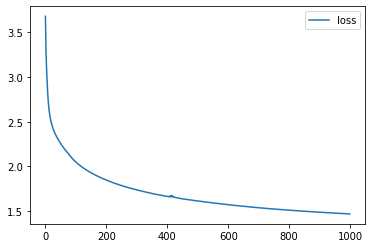

In [50]:
import matplotlib.pyplot as plt
MAX_LENGTH = 625

for i in range(1000):
    opt.zero_grad()

    batch_ix = to_matrix(names)  
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64) # переводим в торч

    logp_seq = rnn_loop(char_rnn, batch_ix) # получаем предсказание 

    # compute loss
    predictions_logp = logp_seq[:, :-1]  # YOUR CODE HERE
    actual_next_tokens = batch_ix[:, 1:]  # YOUR CODE HERE

    #     print(predictions_logp.shape, actual_next_tokens.shape)
    loss = criterion(
        predictions_logp.contiguous().view(-1, num_tokens),
        actual_next_tokens.contiguous().view(-1),
    )
    # YOUR CODE HERE

    # train with backprop
    loss.backward()
    opt.step()

    # YOUR CODE HERE

    history.append(loss.data.numpy())
    if (i + 1) % 100 == 0:
        clear_output(True)
        plt.plot(history, label="loss")
        plt.legend()
        plt.show()

assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."

In [51]:
def generate_sample(char_rnn, seed_phrase=" ", max_length=MAX_LENGTH, temperature=1.0):
    """
    The function generates text given a phrase of length at least SEQ_LENGTH.
    :param seed_phrase: prefix characters. The RNN is asked to continue the phrase
    :param max_length: maximum output length, including seed_phrase
    :param temperature: coefficient for sampling.  higher temperature produces more chaotic outputs,
                        smaller temperature converges to the single most likely output
    """

    x_sequence = [token_to_idx[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)
    hid_state = char_rnn.initial_state(batch_size=1) #batch_size=1 т к предсказываем по 1му имени

    # feed the seed phrase, if any
    for i in range(len(seed_phrase) - 1):
        hid_state, _ = char_rnn(x_sequence[:, i], hid_state)

    # start generating
    for _ in range(max_length - len(seed_phrase)):
        hid_state, logits = char_rnn(x_sequence[:, -1], hid_state) #в нейронку отправляем предыдущий символ и актуальное скрытое состоние 
        p_next = F.softmax(logits / temperature, dim=-1).data.numpy()[0] # temperature - снижения разрозненности данных (большой не слишком большой)

        # sample next token and push it back into x_sequence
        next_ix = np.random.choice(num_tokens, p=p_next) # случайно выбираем следующую букву для слова пропорционально предсказаниям
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)

    return "".join([tokens[ix] for ix in x_sequence.data.numpy()[0]]) # переводим идексы в буквы и получаем строкут

In [23]:
for _ in range(10):
    print(generate_sample(char_rnn))

 sumented thee me sake, as to sweet the bting of id true forty croutservelquentath's which  thely heart it so this sainte,   thou lokilly loker;  for thee,  the in faited of my dothern i pertender drissel', and they now to comee!  is the i and streast with mught, to bed,  love shall;   on thy of betces somen'd, thou hends though in seever.    thehes cromment in adow cant as crome piver'd mant yough i bliseply dury bove burit love,    thy love.                                                    i i contten neat artay, pro, when of a mesie's eye age it love, feath ury in the diccelf fooksce's tot grong flow long chy her
 excunn, aix,   le,  loven fold leap brear allon i false whothing muck must thy his pailt words same weed neves have;  andor fore doon thee yeth with thin'd sweet;  and day,  for,  but beauty rage of the there 'truitnect gife, or love liuthrings geast lost wharest?  o thee will brefue,  o! thosed,   the keepsed i can malsle yest co with ene.                               

In [24]:
for _ in range(1):
    print(generate_sample(char_rnn, seed_phrase=" friend"))

 friend, to thy bould  whered the,  aid.                                             as thy tiasurehing,  when at my love reball as thy rewamine to 'war chough sustreng's in lilvel me?       that hour werest hers and you liempled wend,  ores ridex reige on thee which bood is spreavats they stold whele res: whoth not repuss coul  kee awert;   ening once gxact blage migh,  buth live ligly i, praite:      neemple.      is swove, for vim; and canfes spekil his undeld't desailst, loke come;    when a plays moul and fear.   sore have takived bart gillose and their to thou sblove art remmen which rose, if are whires hear of 


### More poetic model

Let's use LSTM instead of vanilla RNN and compare the results.

Plot the loss function of the number of epochs. Does the final loss become better?

In [53]:

# read and prepare the data
with open('./sonnets.txt', 'r') as f:
    text = f.read()

# get the set of all characters
characters = tuple(set(text))

# use enumeration to give the characters integer values
int2char = dict(enumerate(characters))

# create the look up dictionary from characters to the assigned integers
char2int = {char: index for index, char in int2char.items()}

# encode the text, using the character to integer dictionary
encoded = np.array([char2int[char] for char in text])

In [54]:
# batching function
def get_batches(arr, n_seqs_in_a_batch, n_characters):
    '''Create a generator that returns batches of size
       n_seqs x n_steps from arr.
       
       Arguments
       ---------
       arr: Array you want to make batches from
       n_seqs: Batch size, the number of sequences per batch
       n_steps: Number of sequence steps per batch
    '''
    
    batch_size = n_seqs_in_a_batch * n_characters
    n_batches = len(arr)//batch_size
    
    # Keep only enough characters to make full batches
    arr = arr[:n_batches * batch_size]
    # Reshape into n_seqs rows
    arr = arr.reshape((n_seqs_in_a_batch, -1))
    
    for n in range(0, arr.shape[1], n_characters):
        # The features
        x = arr[:, n:n+n_characters]
        # The targets, shifted by one
        y = np.zeros_like(x)
        try:
            y[:, :-1], y[:, -1] = x[:, 1:], arr[:, n+n_characters]
        except IndexError:
            y[:, :-1], y[:, -1] = x[:, 1:], arr[:, 0]
        yield x, y

In [62]:
# build the model using the pytorch nn module
class CharLSTM(nn.ModuleList):
    def __init__(self, sequence_len, vocab_size, hidden_dim, batch_size):
        super(CharLSTM, self).__init__()
        
        # init the meta parameters
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.sequence_len = sequence_len
        self.vocab_size = vocab_size
        
        # first layer lstm cell
        self.lstm_1 = nn.LSTMCell(input_size=vocab_size, hidden_size=hidden_dim)
        
        # second layer lstm cell
        self.lstm_2 = nn.LSTMCell(input_size=hidden_dim, hidden_size=hidden_dim) 
        
        # dropout layer for the output of the second layer cell
        self.dropout = nn.Dropout(p=0.5)
        
        # fully connected layer to connect the output of the LSTM cell to the output
        self.fc = nn.Linear(in_features=hidden_dim, out_features=vocab_size)
        
    def forward(self, x, hc):
        """
            x: input to the model
                *  x[t] - input of shape (batch, input_size) at time t
                
            hc: hidden and cell states
                *  tuple of hidden and cell state
        """ 
        
        # empty tensor for the output of the lstm
        output_seq = torch.empty((self.sequence_len, 
                                  self.batch_size, 
                                  self.vocab_size))
        
        # pass the hidden and the cell state from one lstm cell to the next one
        # we also feed the output of the first layer lstm cell at time step t to the second layer cell
        # init the both layer cells with the zero hidden and zero cell states
        hc_1, hc_2 = hc, hc
        
        # for every step in the sequence
        for t in range(self.sequence_len):
            
            # get the hidden and cell states from the first layer cell
            hc_1 = self.lstm_1(x[t], hc_1)
            
            # unpack the hidden and the cell states from the first layer
            h_1, c_1 = hc_1
        
            # pass the hidden state from the first layer to the cell in the second layer
            hc_2 = self.lstm_2(h_1, hc_2)
            
            # unpack the hidden and cell states from the second layer cell
            h_2, c_2 = hc_2
        
            # form the output of the fc
            output_seq[t] = self.fc(self.dropout(h_2))
        
        # return the output sequence
        return output_seq.view((self.sequence_len * self.batch_size, -1))
          
    def init_hidden(self):
        
        # initialize the hidden state and the cell state to zeros
        return (torch.zeros(self.batch_size, self.hidden_dim),
                torch.zeros(self.batch_size, self.hidden_dim))

In [63]:
# compile the network - sequence_len, vocab_size, hidden_dim, batch_size
net = CharLSTM(sequence_len=128, vocab_size=len(char2int), hidden_dim=512, batch_size=128)

# define the loss and the optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [64]:
from keras.utils.np_utils import to_categorical
# get the validation and the training data
val_idx = int(len(encoded) * (1 - 0.1))
data, val_data = encoded[:val_idx], encoded[val_idx:]

# empty list for the validation losses
val_losses = list()

# empty list for the samples
samples = list()

for epoch in range(10):
    
    # reinit the hidden and cell steates
    hc = net.init_hidden()
    
    for i, (x, y) in enumerate(get_batches(data, 128, 128)):
        
        # get the torch tensors from the one-hot of training data
        # also transpose the axis for the training set and the targets
        x_train = torch.from_numpy(to_categorical(x, num_classes=net.vocab_size).transpose([1, 0, 2]))
        targets = torch.from_numpy(y.T).type(torch.LongTensor)  # tensor of the target
        
        # zero out the gradients
        optimizer.zero_grad()
        
        # get the output sequence from the input and the initial hidden and cell states
        output = net(x_train, hc)
    
        # calculate the loss
        # we need to calculate the loss across all batches, so we have to flat the targets tensor
        loss = criterion(output, targets.contiguous().view(128*128))
        
        # calculate the gradients
        loss.backward()
        
        # update the parameters of the model
        optimizer.step()
    
        # feedback every 10 batches
        if i % 10 == 0: 
            
            # initialize the validation hidden state and cell state
            val_h, val_c = net.init_hidden()
            
            for val_x, val_y in get_batches(val_data, 128, 128):
                
                # prepare the validation inputs and targets
                val_x = torch.from_numpy(to_categorical(val_x).transpose([1, 0, 2]))
                val_y = torch.from_numpy(val_y.T).type(torch.LongTensor).contiguous().view(128*128)
            
                # get the validation output
                val_output = net(val_x, (val_h, val_c))
                
                # get the validation loss
                val_loss = criterion(val_output, val_y)
                
                # append the validation loss
                val_losses.append(val_loss.item())
                
                # sample 256 chars
                samples.append(''.join([int2char[int_] for int_ in net.predict("A", seq_len=1024)]))
                
            # print("Epoch: {}, Batch: {}, Train Loss: {:.6f}, Validation Loss: {:.6f}".format(epoch, i, loss.item(), val_loss.item()))


In [68]:
def predict(self, char, top_k=5, seq_len=128):
        ''' Given a character, predict the next character.
        
            Returns the predicted character and the hidden state.
        '''
        
        # set the evaluation mode
        self.eval()
        
        # placeholder for the generated text
        seq = np.empty(seq_len+1)
        seq[0] = char2int[char]
        
        # initialize the hidden and cell states
        hc = self.init_hidden()
        
        # now we need to encode the character - (1, vocab_size)
        char = to_categorical(char2int[char], num_classes=self.vocab_size)
        
        # add the batch dimension
        char = torch.from_numpy(char).unsqueeze(0)
        
        # now we need to pass the character to the first LSTM cell to obtain 
        # the predictions on the second character
        hc_1, hc_2 = hc, hc
        
        # for the sequence length
        for t in range(seq_len):
            
            # get the hidden and cell states from the first LSTM layer
            hc_1 = self.lstm_1(char, hc_1)
            h_1, _ = hc_1
            
            # get the hidden and cell states from the second LSTM layer
            hc_2 = self.lstm_2(h_1, hc_2)
            h_2, _ = hc_2            
            
            # pass the output of the cell through fully connected layer
            h_2 = self.fc(h_2)
            
            # apply the softmax to the output to get the probabilities of the characters
            h_2 = F.softmax(h_2, dim=1)
            
            # h_2 now holds the vector of predictions (1, vocab_size)
            # we want to sample 5 top characters
            p, top_char = h_2.topk(top_k)
            
            # get the top k characters by their probabilities
            top_char = top_char.squeeze().numpy()
            
            # sample a character using its probability
            p = p.detach().squeeze().numpy()
            char = np.random.choice(top_char, p = p/p.sum())
        
            # append the character to the output sequence
            seq[t+1] = char
            
            # prepare the character to be fed to the next LSTM cell
            char = to_categorical(char, num_classes=self.vocab_size)
            char = torch.from_numpy(char).unsqueeze(0)

        
            
        return seq

In [74]:
for _ in range(1):
    print(predict(net,char="f"))

RuntimeError: ignored

Generate text using the trained net with different `temperature` parameter: `(0.1, 0.2, 0.5, 1.0, 2.0)`.

Evaluate the results visually, try to interpret them.

In [52]:
# Text generation with different temperature values here
for _ in range(1):
  for t in [0.1, 0.2, 0.5, 1.0, 2.0]:
    print(generate_sample(char_rnn, temperature=t, seed_phrase=" friend"))

 friend the shall the so the seem the the so the the shall the so shall the the so the shall the the so the the so my love the so my love the the so the the so the the seem the strack the so my love the so the the so the the still the with the the shall the the shall the the so shall the the so shall the the so the the shall the the so the so the so the beauty the shall the the so the so the so the the so the the so the the seem the the so the the so the so the so the the so the the so the the so the the shall the the so the the so the so the so the the so the the so the the shall the the so the the so the so the the 
 friend the beauty the the with the the self the so my love the shall the the since the the the so the the seem the thou should the beauty the the shall the so the the see the sunger the so the beauty the the so shall the so shall the the thou still the the such the the some in the the seem the the so the with the the so my seem the the so the that the beauty the so the t

### Saving and loading models

Save the model to the disk, then load it and generate text.
Follow guides from [this tutorial](https://pytorch.org/tutorials/beginner/saving_loading_models.html).

You need to use `Save/Load state_dict (Recommended)` section aka save state dict.

In [79]:
# Saving and loading code here
PATH = './rnn.pkl'
torch.save(char_rnn.state_dict(), PATH)

model = CharRNNCell()
model.load_state_dict(torch.load(PATH))
model.eval()

CharRNNCell(
  (embedding): Embedding(38, 625)
  (rnn_update): Linear(in_features=689, out_features=64, bias=True)
  (rnn_to_logits): Linear(in_features=64, out_features=38, bias=True)
)

## Additional materials on topic

1. [Andrew Karpathy blog post about RNN.](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)\
There are several examples of genration: Shakespeare texts, Latex formulas, Linux Sourse Code and children names.
2. <a href='https://github.com/karpathy/char-rnn'> Repo with char-rnn code </a>
3. Cool repo with [PyTorch examples](https://github.com/spro/practical-pytorch`)